# LDA : Latent Dirichlet Allocation  :  NIPS_Papers_1997_2015 dataset

### LDA imagines a fixed set of topics. Each topic represents a set of words. And the goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.
### Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications.

## Importing necessary packages and modules

In [3]:
# Importing modules
import pandas as pd
import os
import numpy as np

#spacy module for pre-processing
import spacy

#import BOW
from sklearn.feature_extraction.text import CountVectorizer


# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


#Plotting 
from yellowbrick.text import FreqDistVisualizer

# wordcloud library
from wordcloud import WordCloud

#LDA visualisation
import pyLDAvis
from pyLDAvis import sklearn as lda_vis


In [1]:
!pip3 install wordcloud

You should consider upgrading via the 'c:\users\roma\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Import the dataset

In [7]:
# Read data
df = pd.read_csv("NIPS_Papers_1997_2015.csv")
df.head()

,year,title,paper_text
0,2015,3D Object Proposals for Accurate Object Class ...,3D Object Proposals for Accurate Object Class\...
1,2015,A Bayesian Framework for Modeling Confidence i...,A Bayesian Framework for Modeling Confidence i...
2,2015,A class of network models recoverable by spect...,A class of network models recoverable by spect...
3,2015,A Complete Recipe for Stochastic Gradient MCMC,A Complete Recipe for Stochastic Gradient MCMC...
4,2015,A Convergent Gradient Descent Algorithm for Ra...,A Convergent Gradient Descent Algorithm for\nR...


In [8]:
# convert data into lowercase 
# Using only "title" column

df['title'] =  df['title'].str.lower()

### NLP object is used to create documents with linguistic annotations and various nlp properties.

In [9]:
#loading the NLP object
nlp = spacy.load("en_core_web_sm",disable = ['textcat','ent','parser'])

### spaCy is used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

In [10]:
#converting to a spacy object

title_spacy = df['title'].apply(lambda x : nlp(x))
df['title_spacy'] = title_spacy

In [11]:
##spacy preprocessing function

def is_token_allowed(token):
    if (token.is_stop or token.is_punct or token.is_digit or token.is_space or len(token.text) ==1): 
         return False
    return True

def preprocess_token(token):
    return token.lemma_

df['title_processed'] = df['title_spacy'].apply(lambda x: [preprocess_token(token)
    for token in x if is_token_allowed(token)])

In [12]:
#unlist
df['title_processed'] = df['title_processed'].apply(
                                lambda x: " ".join([w for w in x]))

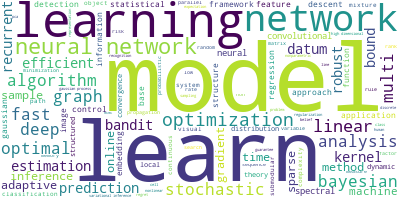

In [13]:
# Join the processed paper_texts together.
long_string = ','.join(list(df['title_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500,contour_width=3, contour_color='purple')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## a. Get the top 10 words for the title column

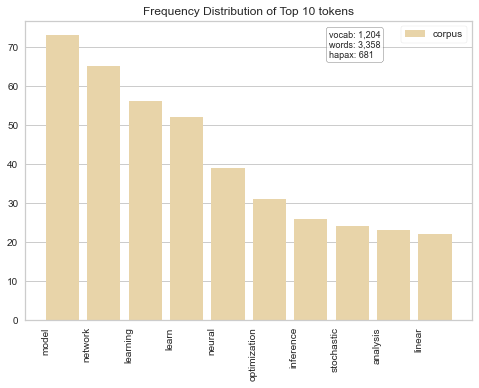

In [14]:
#get the top 10 words

count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed paper_texts
count_data = count_vectorizer.fit_transform(df['title_processed'])
features   = count_vectorizer.get_feature_names()

#refer https://www.scikit-yb.org/en/latest/api/text/freqdist.html
visualizer = FreqDistVisualizer(features=features,n=10,color='#e8d4a9',orient = 'v')
visualizer.fit(count_data)
visualizer.show()

## b. Provide LDA results in an HTML file using pyLDAvis and tune the hyperparameters.

In [15]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
# No. of topics
number_topics = 5
# No. of words inside the topic
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
network model neural multi method

Topic #1:
neural network learning learn model

Topic #2:
learn model kernel analysis gradient

Topic #3:
optimization learning model convex algorithm

Topic #4:
network model deep learning learn


### Given a word, what all topics it can belong to (Fuzzy Clustering)
The word "network" can come under the topics "model","neural","multi","method".

What is the probability it will belong to?? (next cell)

# Visualising the output
## Gives the list of all the topics and their probabilities of their belonging to the topics.

In [16]:
#LDA visualisation output saved as a html file

LDAvis_filepath = os.path.join('ldavis_Title'+str(number_topics))


LDAvis_prepared = lda_vis.prepare(lda, count_data, count_vectorizer)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_Title'+ str(number_topics) +'.html')

# Inference

# Graph  (Intertopic Distance Map)  -  "Title"

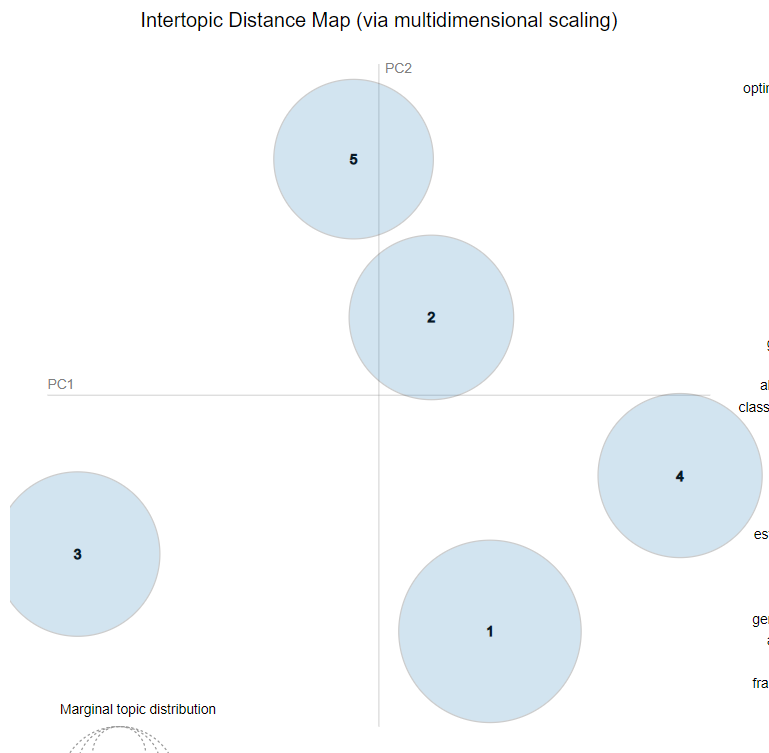

1,2,3,4,5, represents the five topics which was given as our initial input.
Names of the topics

Topic #0:
network 

Topic #1:
neural l

Topic #2:
learn 

Topic #3:
optimization 

Topic #4:
network 

The above graph gives an idea about the Clustering
Clustering which telles us "How similar or dissimilar the topics are..?"

In our graph, there is no overlapping seen between the topics.
Only topic 1(Bubble 2) and topic 4(Bubble 5) are a bit closer, but no overlapping can be seen.
No overlapping between the topics indicates that all the topics are dissimilar.
Overlapping indicates similarity, i.e., words which are commonly occuring between these two topics.


### Overlapping is something which we want to avoid. Because the topics should be divergent or say different from each other so that there exists a good mix of words. 


## How to avoid Overlapping ???  

### To overcome the scenarios of overlapping we need to tweak the parameters or say tune the topics; to know the similarity or the dissimilarity of words.

Parameter to tune : Relevance Metric, represented by Lambda.
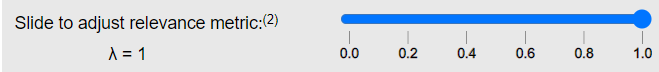

The lesser the lambda, more is the similarity in the topics.
Higher the lambda, lesser the similarity and the difference between the two topics is going to be different.
So, relevancy will be more for a given topic when lambda or the relevance metric increases.
Basically, the divergence or dissimilarity will be more as the value of lambda increases.
Dissimilarity will be less lambda decreases.


With the decrease in the value of lambda, the red region in the graph increases, which signifies the overlapping regions or a lot of similarity in the topics but as the lambda increases we see the increase in the blue regions or dissimilarity in the topics.

Basically we want to desire dissimilarity in the tokens and need to check the similarity in the topics. 


# c. LDA : Comparison between "Title" and "Paper_text" 

## Intertopic Distance Map
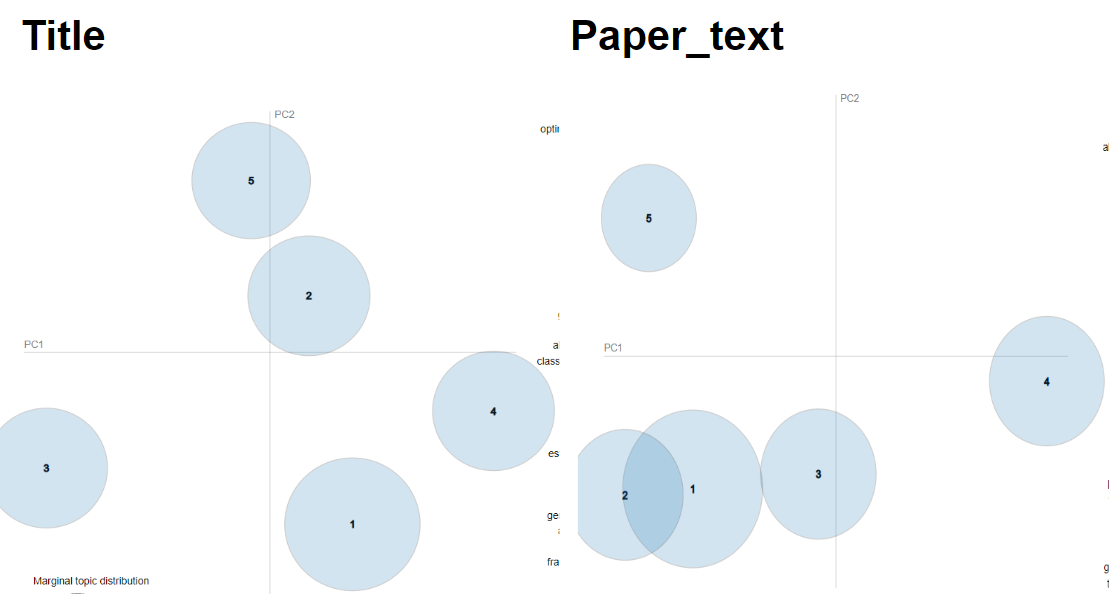

"Title"

Topics found via LDA:

Topic #0:
network model neural multi method

Topic #1:
neural network learning learn model

Topic #2:
learn model kernel analysis gradient

Topic #3:
optimization learning model convex algorithm

Topic #4:
network model deep learning learn

"Paper_text"

Topics found via LDA:

Topic #0:
algorithm set graph node function

Topic #1:
model method datum set kernel

Topic #2:
model matrix algorithm distribution log

Topic #3:
network model image layer neural

Topic #4:
algorithm function problem state set

# Overlapping of the Topics

## "Title"
Topics don't overlap with each other.

Inference : No similarity exists in the topics, topics are dissimilar.

## "Paper_text"
Two of the topics overlap with each other.
Overlapping between topic 1 and topic 2. 
And slight overlapping also seen between topic 1 and topic 3.

Inference : Similarity exists in between the topics.

The Relevance metric can be adjusted accordingly to check for the probabilities

## Relevance Metric  :  for low estimated term frequency within the selected topic


"Title"

Topic 1 [23.8% of tokens] :  0.29

Topic 2 [19.4% of tokens] :  0.39

Topic 3 [19.4% of tokens] : 0.54

Topic 4 [19.3% of tokens]  : 0.69

Topic 5 [18.2% of tokens] : 0.48